Algorithm comparison

**Goal:** first work on the classifier
  
This notebook is divided in two parts:
* **1. Bla**

In [1]:
%run ../../../utils/Python/setup_environment.ipy
%run ../../../utils/Python/selene_job.ipy

Setup environment... done!


<span style="color:green">✅ Working on **impact-annotator_env** conda environment.</span>

# Get the data

In [2]:
data = Impact_Wrapper('../../../data/impact_181105/annotated_final_IMPACT_mutations_181105.txt', 'is_artefact')
data.impact = data.impact.drop('variant_caller_cv', axis=1)

In [3]:
features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF',
            'gene_type']

X, y = data.process(features).get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X, y)

X: (225561, 45) | y: (225561,)


count_   freq_
False  218425  96.84%
True     7136   3.16%

In [4]:
X.head()

t_depth    t_vaf  t_alt_count  n_depth    n_vaf  n_alt_count  \
132429    969.0  0.32817        318.0    918.0  0.00218          2.0   
198630    292.0  0.06507         19.0    325.0  0.00000          0.0   
28359     823.0  0.13001        107.0    695.0  0.00144          1.0   
188831    879.0  0.10125         89.0    569.0  0.00000          0.0   
187954    374.0  0.09358         35.0    297.0  0.00000          0.0   

        sample_coverage  frequency_in_normals  VEP_COSMIC_CNT  VEP_gnomAD_AF  \
132429            827.0                 0.000             0.0            0.0   
198630            405.0                 0.000             0.0            0.0   
28359             628.0                 0.000             4.0            0.0   
188831            836.0                 0.000             0.0            0.0   
187954            584.0                 0.022             0.0            0.0   

        VEP_gnomAD_total_AF_AFR  VEP_gnomAD_total_AF_AMR  \
132429                      0.0                      0.0   
198630                      0.0                      0.0   
28359                       0.0                      0.0   
188831                      0.0                      0.0   
187954                      0.0                      0.0   

        VEP_gnomAD_total_AF_ASJ  VEP_gnomAD_total_AF_EAS  \
132429                      0.0                      0.0   
198630                      0.0                      0.0   
28359                       0.0                      0.0   
188831                      0.0                      0.0   
187954                      0.0                      0.0   

        VEP_gnomAD_total_AF_FIN  VEP_gnomAD_total_AF_NFE  \
132429                      0.0                      0.0   
198630                      0.0                      0.0   
28359                       0.0                      0.0   
188831                      0.0                      0.0   
187954                      0.0                      0.0   

        VEP_gnomAD_total_AF_OTH  VEP_gnomAD_total_AF_max  VEP_gnomAD_total_AF  \
132429                      0.0                      0.0                  0.0   
198630                      0.0                      0.0                  0.0   
28359                       0.0                      0.0                  0.0   
188831                      0.0                      0.0                  0.0   
187954                      0.0                      0.0                  0.0   

        VEP_Consequence_frameshift_variant  VEP_Consequence_inframe_deletion  \
132429                                 0.0                               0.0   
198630                                 0.0                               0.0   
28359                                  0.0                               0.0   
188831                                 0.0                               0.0   
187954                                 0.0                               0.0   

        VEP_Consequence_inframe_insertion  VEP_Consequence_missense_variant  \
132429                                0.0                               1.0   
198630                                0.0                               1.0   
28359                                 0.0                               1.0   
188831                                0.0                               0.0   
187954                                0.0                               1.0   

        VEP_Consequence_splice_acceptor_variant  \
132429                                      0.0   
198630                                      0.0   
28359                                       0.0   
188831                                      0.0   
187954                                      0.0   

        VEP_Consequence_splice_donor_variant  VEP_Consequence_start_lost  \
132429                                   0.0                         0.0   
198630                                   0.0                         0.0   
28359                            

# Set cross-validation strategies and load some modules

We choose stratified folds (made by preserving the percentage of samples for each class) for both outer and nested cross-validation.

In [5]:
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

In [6]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

In [7]:
# create object to holds results
summary = Summary()

# Uniform

Generates predictions uniformly at random, expected accuracy: 0.5 | expected AUC: 0.5.

In [33]:
from sklearn.dummy import DummyClassifier

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      DummyClassifier(strategy='uniform', random_state=42))

metrics = Metrics(model, X, y, cv_strategy)
metrics.print_mean()

Run model... done! (6.47s)
▴ Mean average_precision: 0.032 ± 0.000
▴ Mean roc_auc          : 0.500 ± 0.000
▴ Mean precision        : 0.031 ± 0.001
▴ Mean recall           : 0.497 ± 0.009
▴ Mean f1               : 0.059 ± 0.001
▴ Mean accuracy         : 0.500 ± 0.001


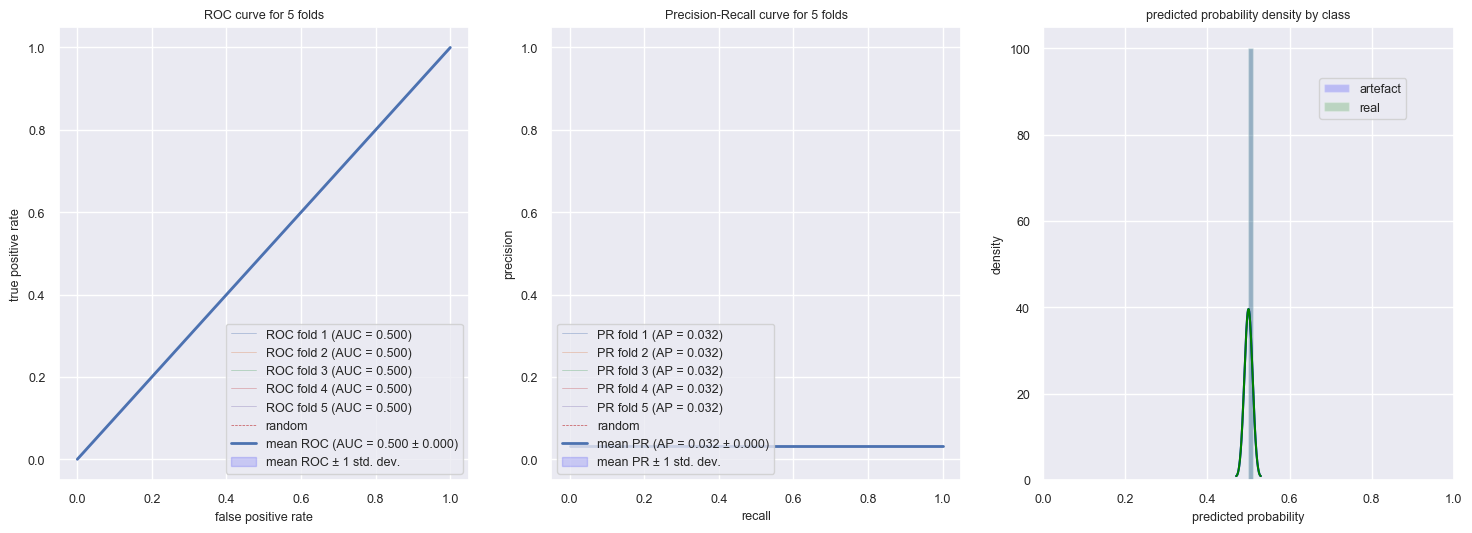

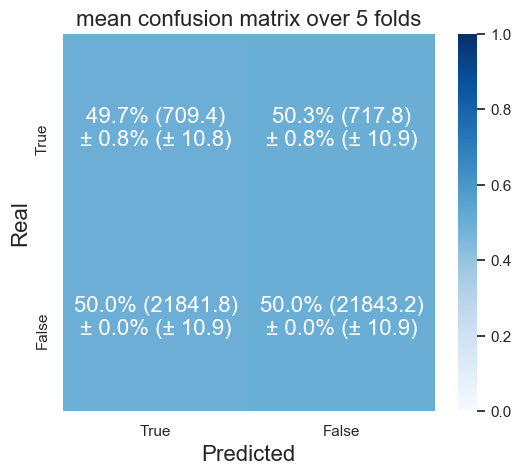

In [34]:
metrics.plot_threshold_decision_curves(figsize=(18, 6), plot_thresholds=False)
metrics.plot_mean_confusion_matrix()

In [35]:
#metrics.get_learning_curves_metrics()
#metrics.plot_learning_curves(figsize=(6, 6))

In [36]:
summary.add(metrics, 'Uniform', 'mediumseagreen')

# Most Frequent

Always predicts the most frequent label in the training set → expected accuracy: proportion of the most reccurent class in the dataset | expected AUC: 0.5

In [37]:
model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      DummyClassifier(strategy='most_frequent', random_state=42))

metrics = Metrics(model, X, y, cv_strategy)
metrics.print_mean()

Run model...

/Users/guilminp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guilminp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guilminp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guilminp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guilminp/anaconda3/lib/python3.6/site

 done! (6.22s)
▴ Mean average_precision: 0.032 ± 0.000
▴ Mean roc_auc          : 0.500 ± 0.000
▴ Mean precision        : 0.000 ± 0.000
▴ Mean recall           : 0.000 ± 0.000
▴ Mean f1               : 0.000 ± 0.000
▴ Mean accuracy         : 0.968 ± 0.000


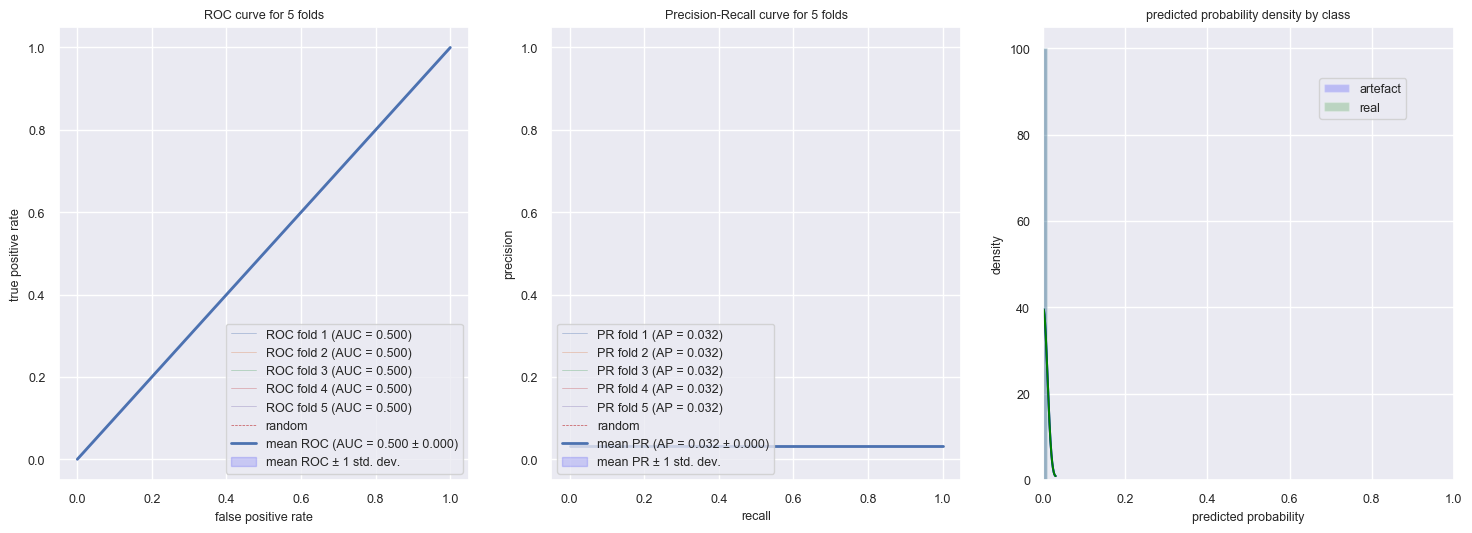

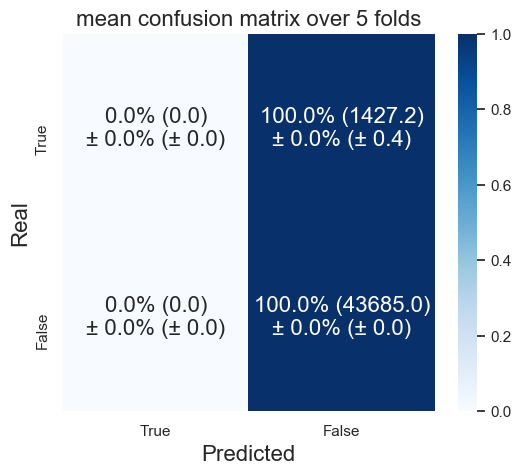

In [38]:
metrics.plot_threshold_decision_curves(figsize=(18, 6), plot_thresholds=False)
metrics.plot_mean_confusion_matrix()

In [39]:
summary.add(metrics, 'MostFrequent', 'seagreen')

# Gaussian Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      StandardScaler(),
                      GaussianNB())

metrics = Metrics(model, X, y, cv_strategy)
metrics.print_mean()

Run model... done! (21.30s)
▴ Mean average_precision: 0.248 ± 0.026
▴ Mean roc_auc          : 0.820 ± 0.011
▴ Mean precision        : 0.334 ± 0.061
▴ Mean recall           : 0.414 ± 0.022
▴ Mean f1               : 0.366 ± 0.031
▴ Mean accuracy         : 0.954 ± 0.007


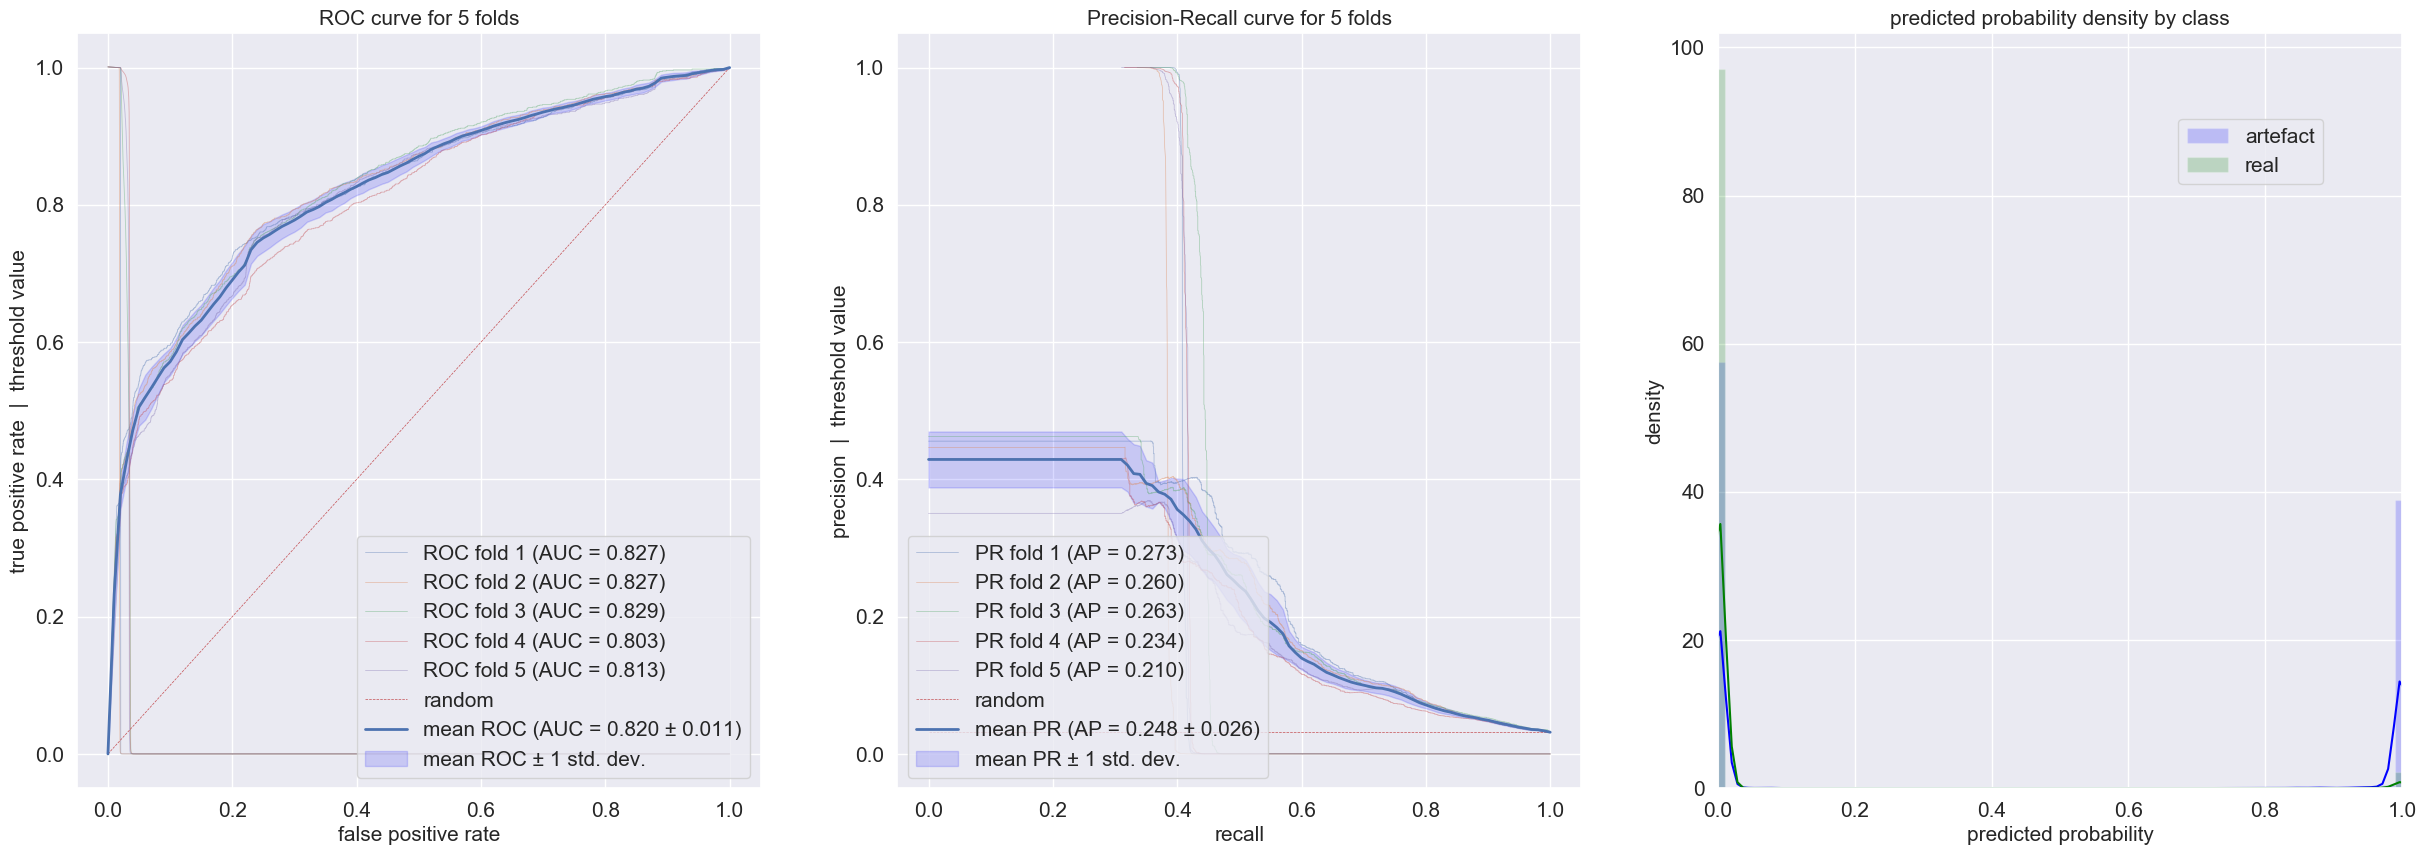

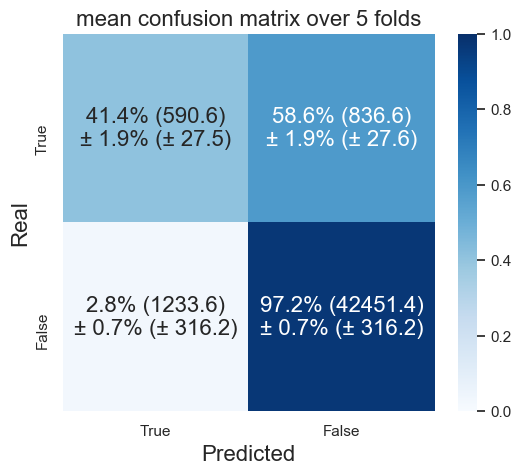

In [41]:
metrics.plot_threshold_decision_curves()
metrics.plot_mean_confusion_matrix()

In [42]:
summary.add(metrics, 'GausssianNaiveBayes', 'darkgoldenrod')

# Ridge regression (L2 regularization)

This model performs an automatic grid search over its parameters.

In [43]:
from sklearn.linear_model import LogisticRegressionCV

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      StandardScaler(),
                      LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42, max_iter=1000))

metrics = Metrics(model, X, y, cv_strategy)
metrics.print_mean()

Run model... done! (28.60s)
▴ Mean average_precision: 0.398 ± 0.014
▴ Mean roc_auc          : 0.841 ± 0.008
▴ Mean precision        : 0.175 ± 0.009
▴ Mean recall           : 0.636 ± 0.016
▴ Mean f1               : 0.274 ± 0.012
▴ Mean accuracy         : 0.893 ± 0.006


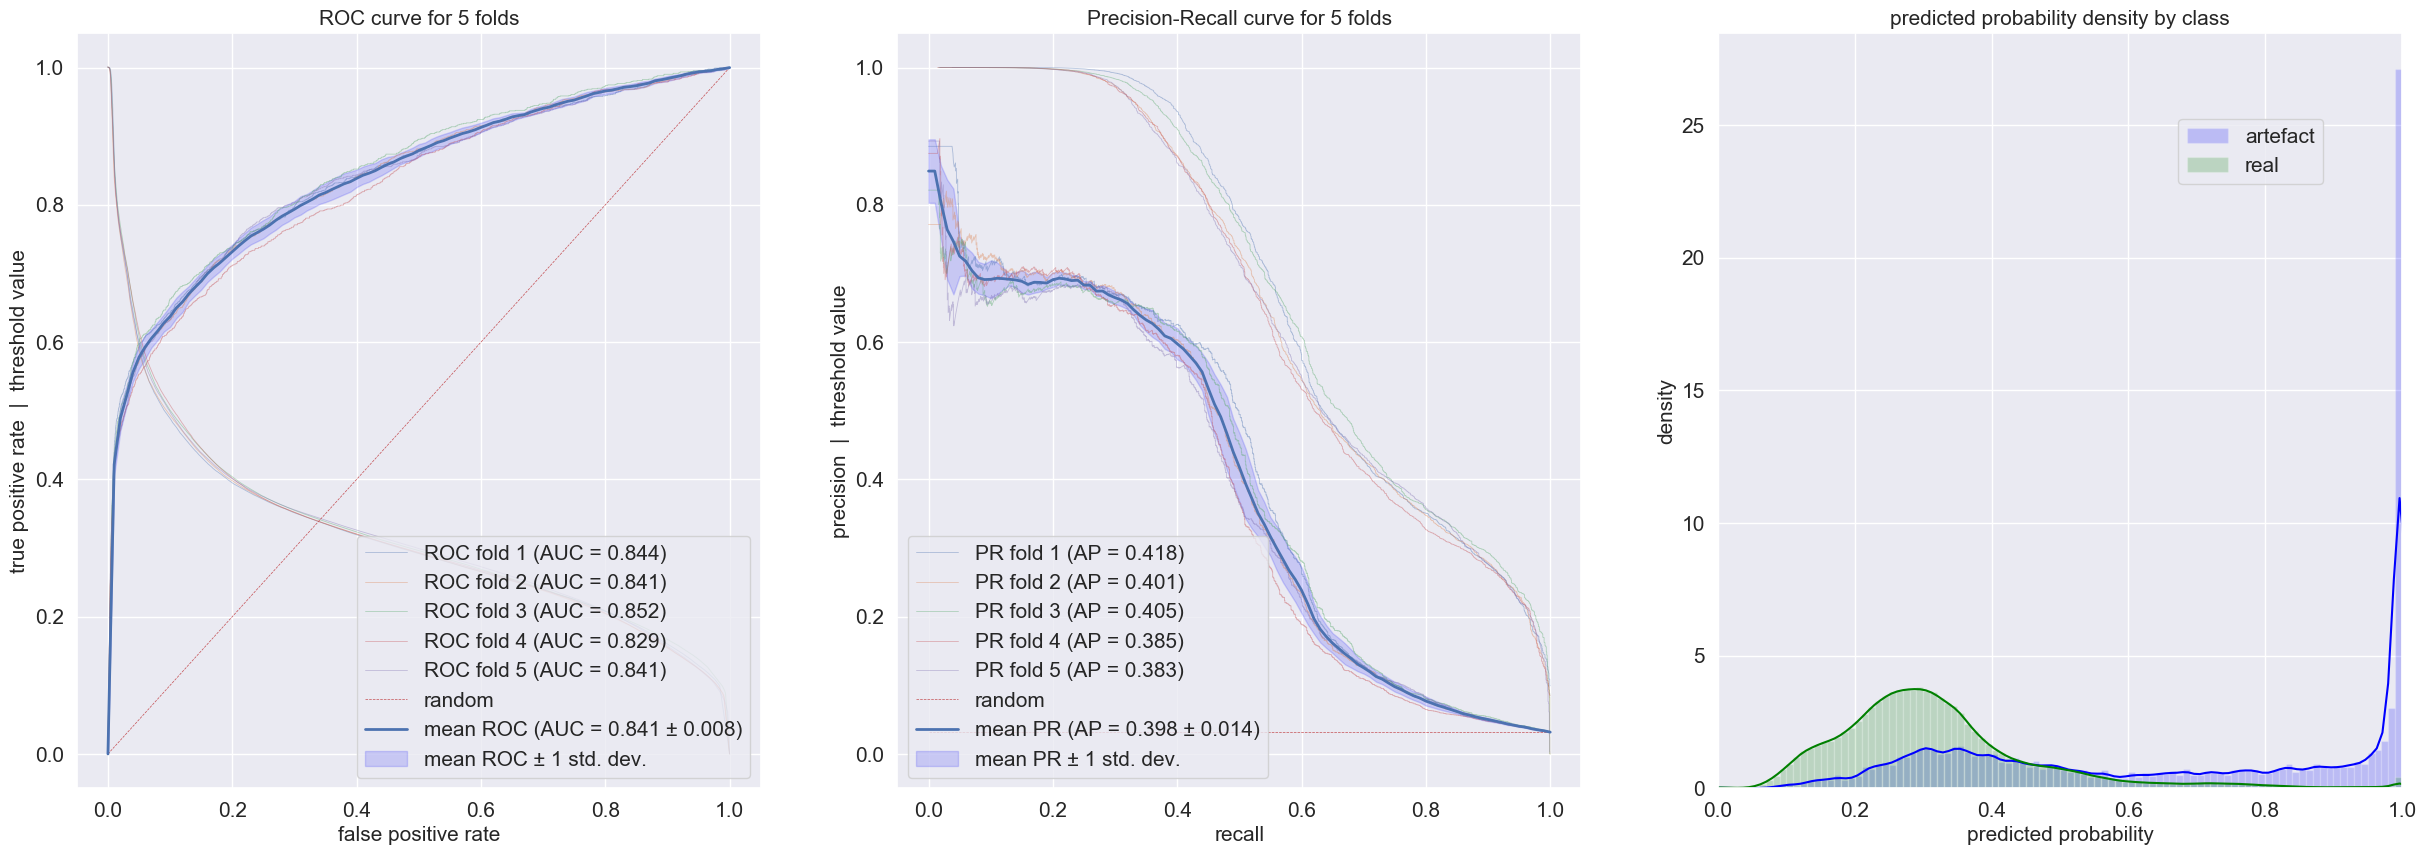

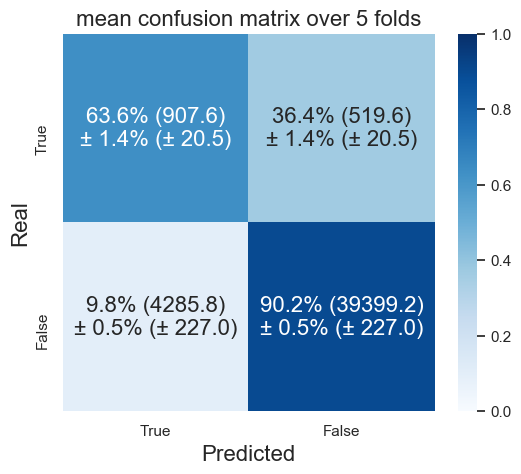

In [44]:
metrics.plot_threshold_decision_curves()
metrics.plot_mean_confusion_matrix()

In [45]:
summary.add(metrics, 'RidgeRegression', 'salmon')

"If your variables are positively correlated, then the coefficients will be negatively correlated, which can lead to a wrong sign on one of the coefficients.", see https://stats.stackexchange.com/questions/1580/regression-coefficients-that-flip-sign-after-including-other-predictors.

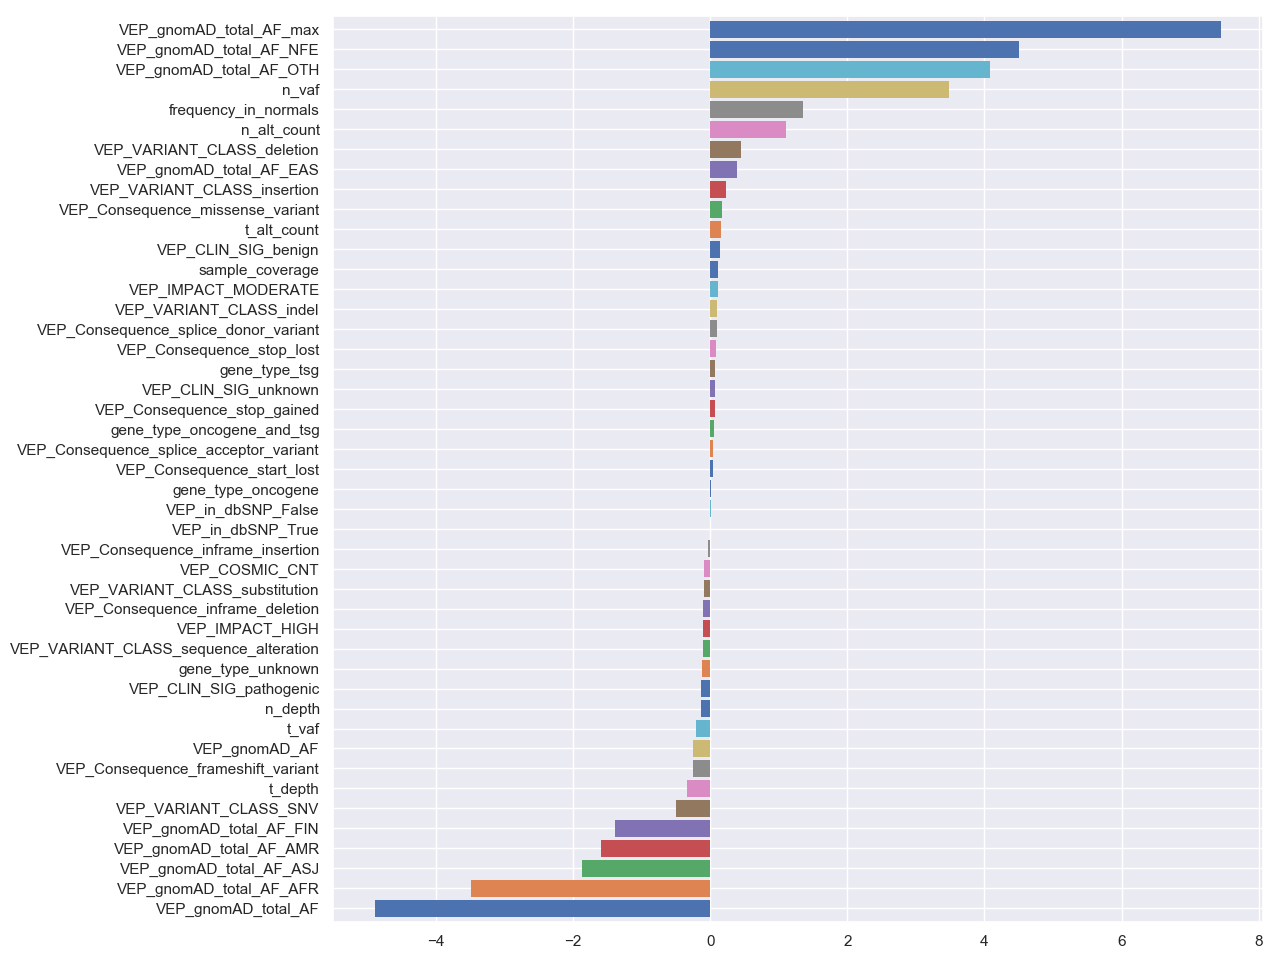

In [46]:
model.fit(X, y)

feature_coefficient = pd.DataFrame({'coeff': model.named_steps['logisticregressioncv'].coef_[0]}, index=X.columns.tolist())
feature_coefficient.sort_values(by='coeff', axis=0, inplace=True)

plt.figure(figsize = (12, 12))
feature_coefficient.coeff.plot.barh(width=0.85, linewidth=0);

# Lasso regression (L1 regularization)

In [8]:
job = Selene_Job('LassoRegression_181105', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs')

➞ mkdir on local computer ssh_remote_jobs/job_LassoRegression_181105


<span style="color:green">Job < LassoRegression_181105 >: </span>✅ created

In [43]:
job = Selene_Job('LassoRegression_181105', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < LassoRegression_181105 >: </span>✅ job found and reloaded

In [10]:
job.load_data(X, y)

➞ save X.pkl & y.pkl in ssh_remote_jobs/job_LassoRegression_181105


<span style="color:green">Job < LassoRegression_181105 >: </span>✅ data loaded

In [15]:
%%writefile {job.script_path}

# load the ml_tools functions
%run ../../../../../utils/Python/metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# choose a model and run it
from sklearn.linear_model import LogisticRegressionCV
model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      StandardScaler(),
                      LogisticRegressionCV(cv=nested_cv_strategy, penalty='l1', solver='liblinear', scoring='roc_auc', random_state=42, max_iter=1000))
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ssh_remote_jobs/job_LassoRegression_181105/script.ipy


In [16]:
job.run(n_jobs=5, short_job=True)

➞ scp ssh_remote_jobs/job_LassoRegression_181105 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_LassoRegression_181105
script.ipy                                    100% 1002   167.2KB/s   00:00    
X.pkl                                         100%   50MB  16.6MB/s   00:03    
y.pkl                                         100% 3745KB  17.2MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_LassoRegression_181105
Job <30403423> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J LassoRegression_181105 -We 59 -n 5 -R "span[ptile=5]" "ipython script.ipy"


<span style="color:green">Job < LassoRegression_181105 >: </span>✅ submitted<br>

In [44]:
job.get_results()

<span style="color:green">Job < LassoRegression_181105 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_LassoRegression_181105 to ssh_remote_jobs/job_LassoRegression_181105
metrics.pkl                                   100% 7702KB   7.5MB/s   00:01    
job_output.txt                                100% 1701    68.6KB/s   00:00    
➞ load metrics.pkl in object self.metrics


▴ Mean average_precision: 0.398 ± 0.014
▴ Mean roc_auc          : 0.841 ± 0.008
▴ Mean precision        : 0.175 ± 0.009
▴ Mean recall           : 0.636 ± 0.016
▴ Mean f1               : 0.275 ± 0.012
▴ Mean accuracy         : 0.894 ± 0.006


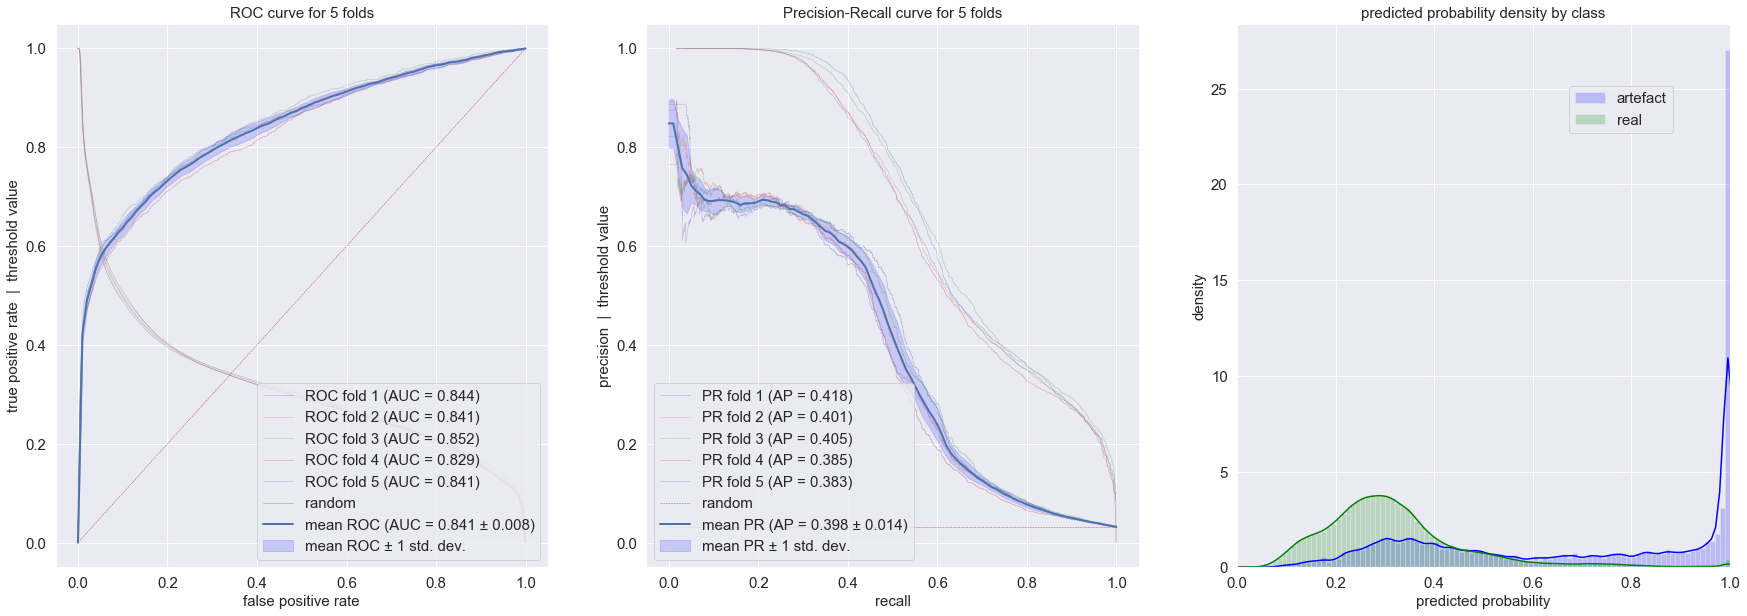

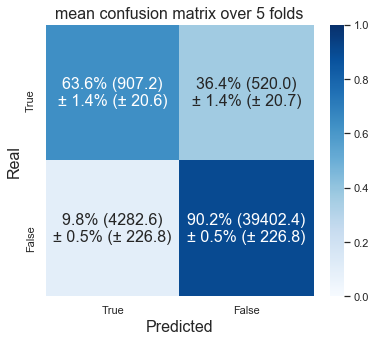

In [45]:
job.metrics.print_mean()
job.metrics.plot_threshold_decision_curves()
job.metrics.plot_mean_confusion_matrix()

In [49]:
summary.add(job.metrics, 'LassoRegression', 'crimson')

We change the regularization to make it stronger (otherwise we get the same result as for the ridge regression previously):

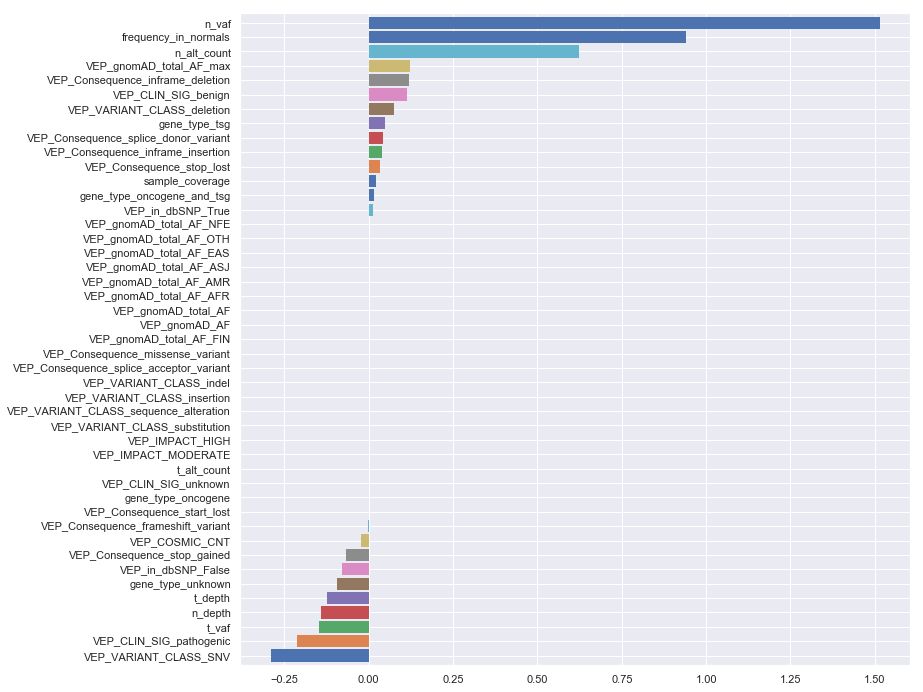

In [55]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      StandardScaler(),
                      LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=0.01))
model.fit(X, y)

feature_coefficient = pd.DataFrame({'coeff': model.named_steps['logisticregression'].coef_[0]}, index=X.columns.tolist())
feature_coefficient.sort_values(by='coeff', axis=0, inplace=True)

plt.figure(figsize = (12, 12))
feature_coefficient.coeff.plot.barh(width=0.85, linewidth=0);

# K Nearest Neighbors

In [18]:
job = Selene_Job('kNN_181105', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs')

➞ mkdir on local computer ssh_remote_jobs/job_kNN_181105


<span style="color:green">Job < kNN_181105 >: </span>✅ created

In [47]:
job = Selene_Job('kNN_181105', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < kNN_181105 >: </span>✅ job found and reloaded

In [20]:
job.load_data(X, y)

➞ save X.pkl & y.pkl in ssh_remote_jobs/job_kNN_181105


<span style="color:green">Job < kNN_181105 >: </span>✅ data loaded

In [21]:
%%writefile {job.script_path}

# load the ml_tools functions
%run ../../../../../utils/Python/metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# choose a model and run it
from sklearn.neighbors import KNeighborsClassifier
parameters_grid = [
                    {'kneighborsclassifier__n_neighbors': [10, 15, 20, 25, 30, 40, 50, 60, 100],
                     'kneighborsclassifier__weights': ['uniform', 'distance']}
                  ]
pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                     StandardScaler(),
                     KNeighborsClassifier())

model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Writing ssh_remote_jobs/job_kNN_181105/script.ipy


In [22]:
job.run(n_jobs=5, short_job=False)

➞ scp ssh_remote_jobs/job_kNN_181105 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_kNN_181105
script.ipy                                    100% 1279   139.4KB/s   00:00    
X.pkl                                         100%   50MB  16.6MB/s   00:03    
y.pkl                                         100% 3745KB  13.9MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_kNN_181105
Job <30403574> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J kNN_181105 -n 5 -R "span[ptile=5]" "ipython script.ipy"


<span style="color:green">Job < kNN_181105 >: </span>✅ submitted<br>

In [48]:
job.get_results()

<span style="color:red">Job < kNN_181105 >: </span>⚠️ does not exist on the cluster, is not done yet or an error occured before the creation of `metrics.pkl`<br>

▴ Mean average_precision: 0.475 ± 0.016
▴ Mean roc_auc          : 0.860 ± 0.007
▴ Mean precision        : 0.185 ± 0.007
▴ Mean recall           : 0.692 ± 0.014
▴ Mean f1               : 0.292 ± 0.009
▴ Mean accuracy         : 0.876 ± 0.005


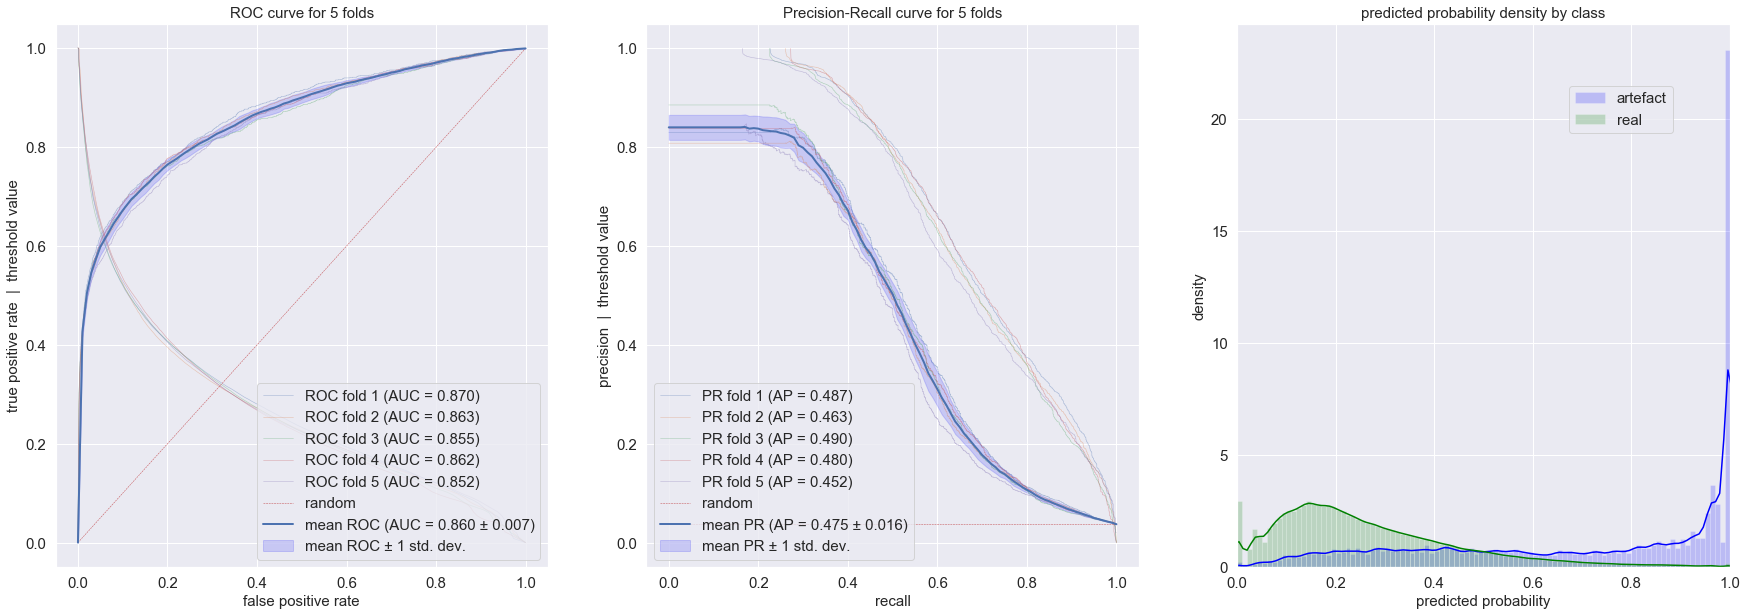

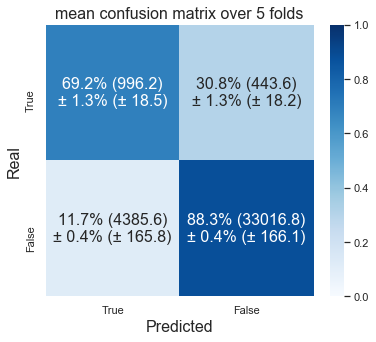

In [4]:
job.metrics.print_mean()
job.metrics.plot_threshold_decision_curves()
job.metrics.plot_mean_confusion_matrix()

2 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → kneighborsclassifier__n_neighbors: [10 15 20 25 30 40 50 60 100]
  → kneighborsclassifier__weights    : ['distance' 'uniform']
Best hyperparameters for each fold:
fold 0: {'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__weights': 'distance'}
fold 1: {'kneighborsclassifier__n_neighbors': 25, 'kneighborsclassifier__weights': 'distance'}
fold 2: {'kneighborsclassifier__n_neighbors': 25, 'kneighborsclassifier__weights': 'distance'}
fold 3: {'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__weights': 'distance'}
fold 4: {'kneighborsclassifier__n_neighbors': 40, 'kneighborsclassifier__weights': 'distance'}


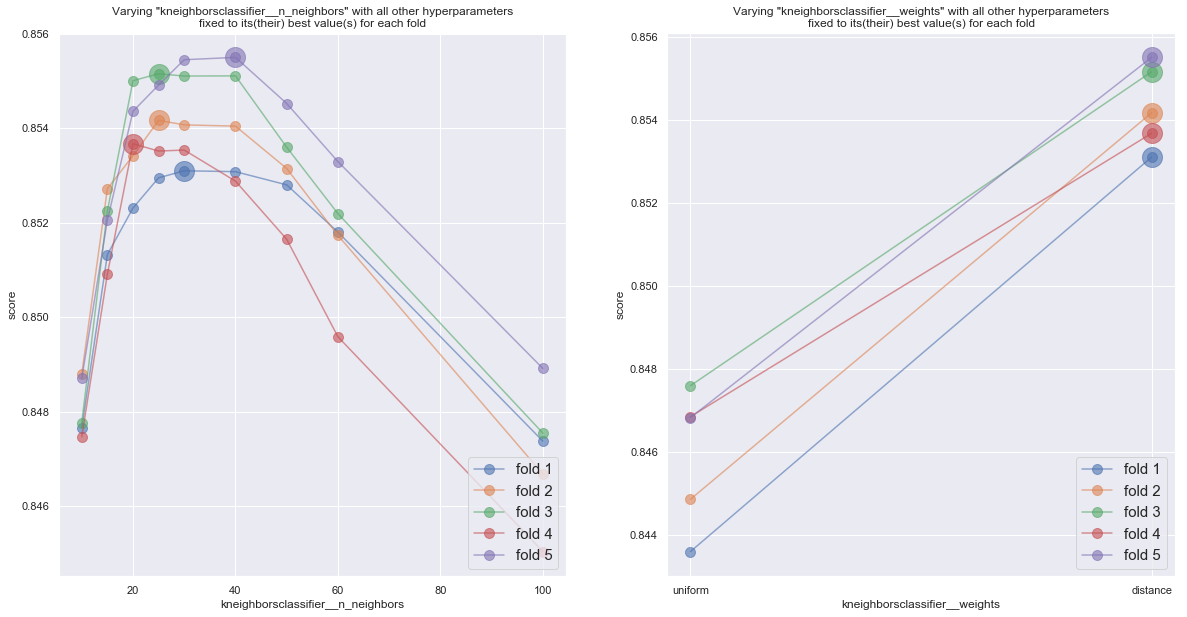

In [5]:
job.metrics.plot_grid_search_results(plot_error_bar = False)

In [43]:
summary.add(job.metrics, 'kNN', 'maroon')

# Support Vector Machine

In [24]:
job = Selene_Job('SVM_181105', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs')

➞ mkdir on local computer ssh_remote_jobs/job_SVM_181105


<span style="color:green">Job < SVM_181105 >: </span>✅ created

In [49]:
job = Selene_Job('SVM_181105', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < SVM_181105 >: </span>✅ job found and reloaded

In [26]:
job.load_data(X, y)

➞ save X.pkl & y.pkl in ssh_remote_jobs/job_SVM_181105


<span style="color:green">Job < SVM_181105 >: </span>✅ data loaded

In [27]:
%%writefile {job.script_path}

# load the ml_tools functions
%run ../../../../../utils/Python/metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# choose a model and run it
from sklearn.svm import SVC
parameters_grid = [
                    {'svc__C': [1, 5, 20, 30, 35, 40],
                     'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
                  ]
pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                     StandardScaler(),
                     SVC(probability=True, cache_size=1000, gamma='scale'))
model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Writing ssh_remote_jobs/job_SVM_181105/script.ipy


In [28]:
job.run(n_jobs=5, short_job=False, memory=8)

➞ scp ssh_remote_jobs/job_SVM_181105 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_SVM_181105
script.ipy                                    100% 1239   117.1KB/s   00:00    
X.pkl                                         100%   50MB   6.2MB/s   00:08    
y.pkl                                         100% 3745KB  15.7MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_SVM_181105
Job <30403578> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J SVM_181105 -n 5 -R "span[ptile=5,mem=8]" "ipython script.ipy"


<span style="color:green">Job < SVM_181105 >: </span>✅ submitted<br>

In [50]:
job.get_results()

<span style="color:red">Job < SVM_181105 >: </span>⚠️ does not exist on the cluster, is not done yet or an error occured before the creation of `metrics.pkl`<br>

▴ Mean average_precision: 0.445 ± 0.008
▴ Mean roc_auc          : 0.857 ± 0.008
▴ Mean precision        : 0.228 ± 0.008
▴ Mean recall           : 0.675 ± 0.014
▴ Mean f1               : 0.341 ± 0.008
▴ Mean accuracy         : 0.903 ± 0.004


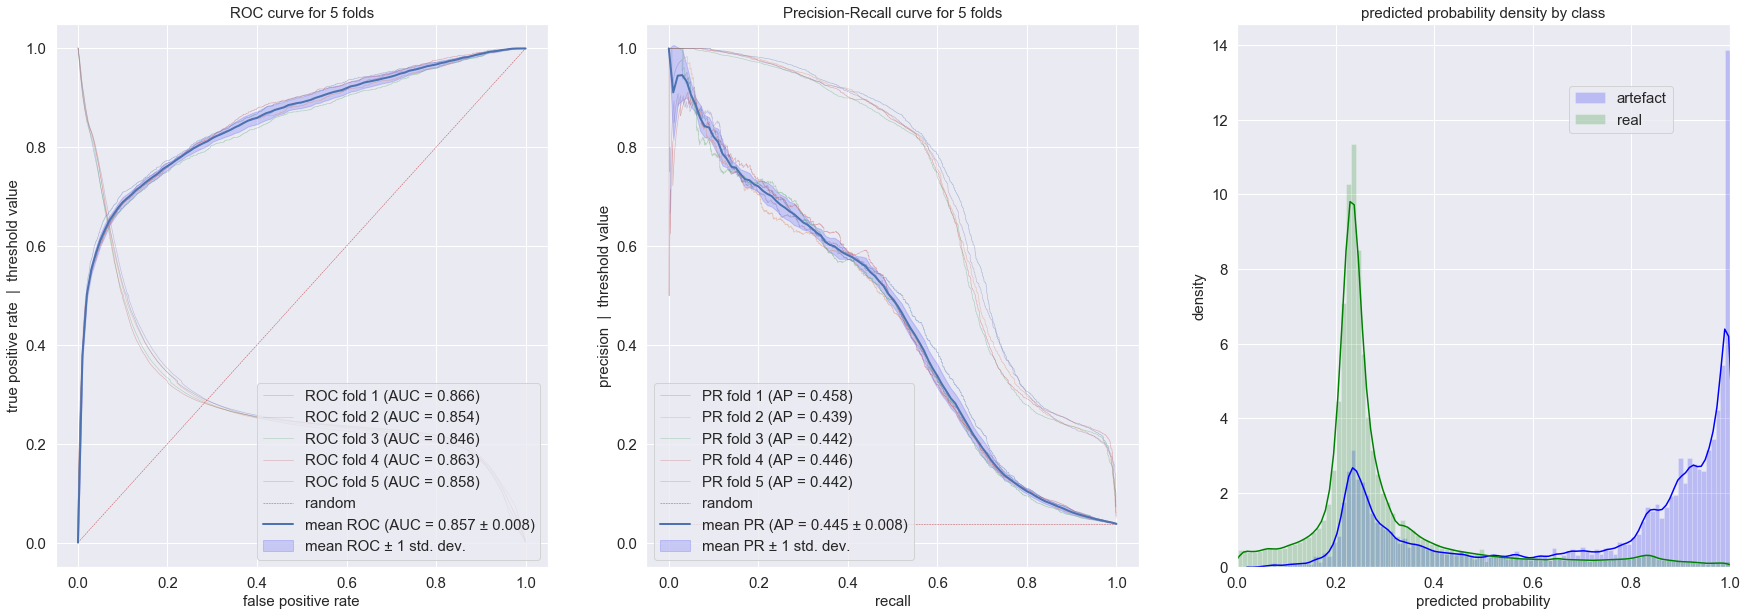

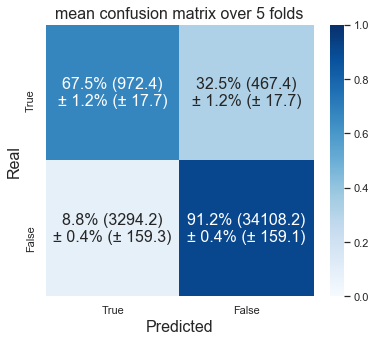

In [4]:
job.metrics.print_mean()
job.metrics.plot_threshold_decision_curves()
job.metrics.plot_mean_confusion_matrix()

2 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → svc__C     : [1 5 20 30 35 40]
  → svc__kernel: ['linear' 'poly' 'rbf' 'sigmoid']
Best hyperparameters for each fold:
fold 0: {'svc__C': 30, 'svc__kernel': 'rbf'}
fold 1: {'svc__C': 40, 'svc__kernel': 'rbf'}
fold 2: {'svc__C': 35, 'svc__kernel': 'rbf'}
fold 3: {'svc__C': 30, 'svc__kernel': 'rbf'}
fold 4: {'svc__C': 30, 'svc__kernel': 'rbf'}


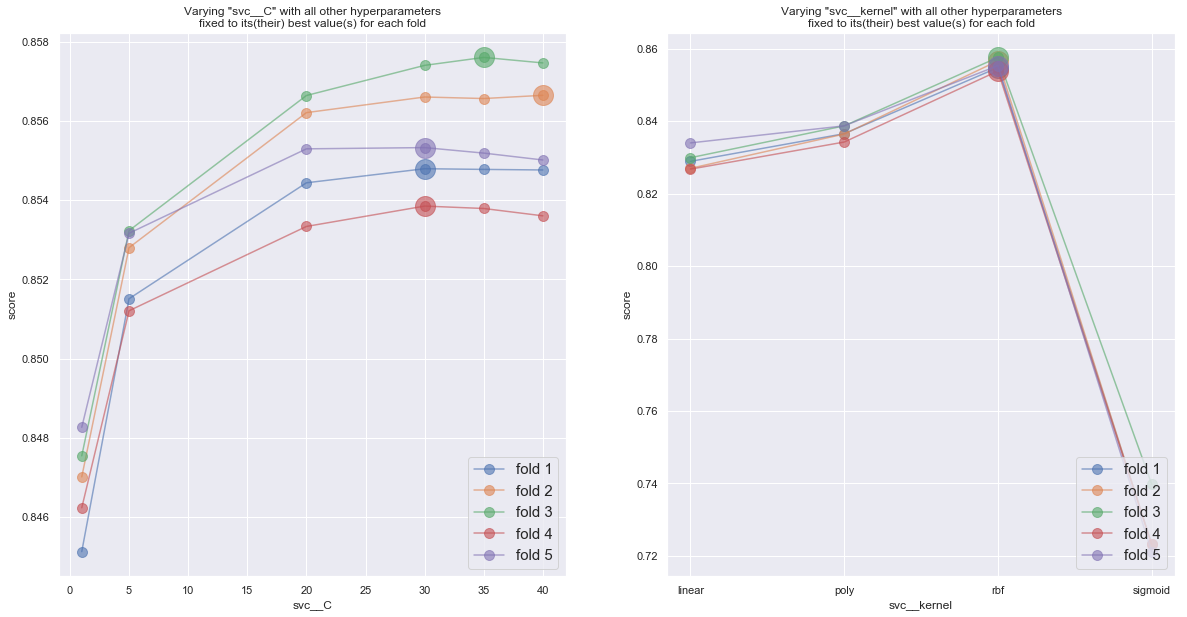

In [5]:
job.metrics.plot_grid_search_results(plot_error_bar = False)

In [46]:
summary.add(job.metrics, 'SVM', 'grey')

# Random Forest

In [29]:
job = Selene_Job('RandomForest_181105', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs')

<span style="color:red">Job < RandomForest_181105 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

In [51]:
job = Selene_Job('RandomForest_181105', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < RandomForest_181105 >: </span>✅ job found and reloaded

In [31]:
job.load_data(X, y)

➞ save X.pkl & y.pkl in ssh_remote_jobs/job_RandomForest_181105


<span style="color:green">Job < RandomForest_181105 >: </span>✅ data loaded

In [32]:
%%writefile {job.script_path}

# load the ml_tools functions
%run ../../../../../utils/Python/metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# choose a model and run it
from sklearn.ensemble import RandomForestClassifier
parameters_grid = [
                    {'randomforestclassifier__n_estimators': [100, 500, 1000, 1500],
                     'randomforestclassifier__criterion': ['gini', 'entropy'],
                     'randomforestclassifier__max_depth': [15, 18, 20, 22, 25, 30, 40, 50]}
                  ]

pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                     RandomForestClassifier(random_state=42))
model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ssh_remote_jobs/job_RandomForest_181105/script.ipy


In [33]:
job.run(n_jobs=20, short_job=False, memory=32)

➞ scp ssh_remote_jobs/job_RandomForest_181105 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_RandomForest_181105
job_output.txt                                100% 1547    72.8KB/s   00:00    
metrics.pkl                                   100% 7532KB  15.9MB/s   00:00    
script.ipy                                    100% 1338    12.6KB/s   00:00    
X.pkl                                         100%   50MB  12.4MB/s   00:04    
y.pkl                                         100% 3745KB   3.7MB/s   00:01    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_RandomForest_181105
Job <30403583> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_181105 -n 2

<span style="color:green">Job < RandomForest_181105 >: </span>✅ submitted<br>

In [52]:
job.get_results()

<span style="color:red">Job < RandomForest_181105 >: </span>⚠️ does not exist on the cluster, is not done yet or an error occured before the creation of `metrics.pkl`<br>

▴ Mean average_precision: 0.505 ± 0.010
▴ Mean roc_auc          : 0.890 ± 0.005
▴ Mean precision        : 0.184 ± 0.004
▴ Mean recall           : 0.730 ± 0.012
▴ Mean f1               : 0.294 ± 0.006
▴ Mean accuracy         : 0.889 ± 0.002


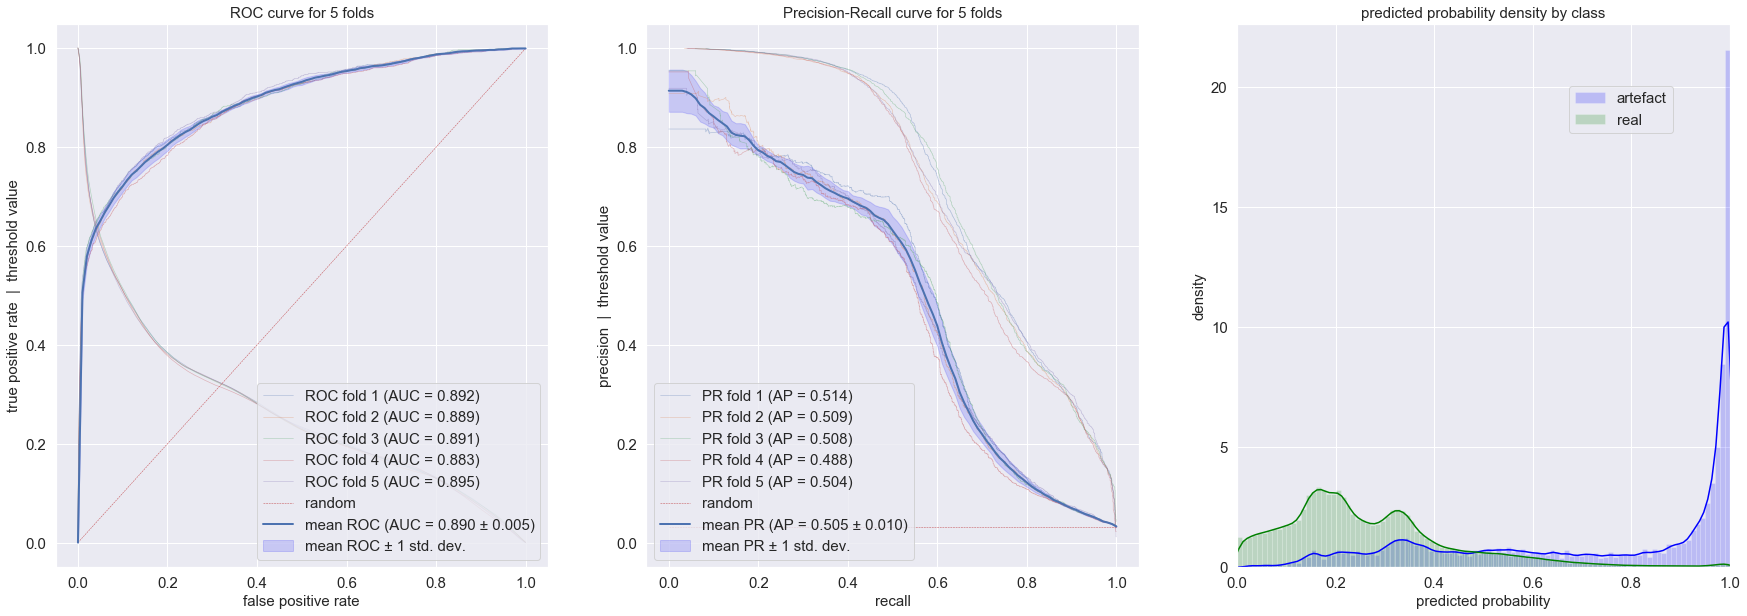

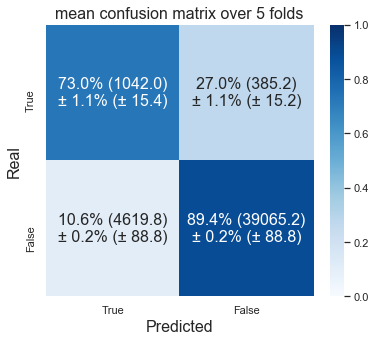

In [17]:
job.metrics.print_mean()
job.metrics.plot_threshold_decision_curves()
job.metrics.plot_mean_confusion_matrix()

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [15 18 20 22 25 30 40 50]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 500}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforest

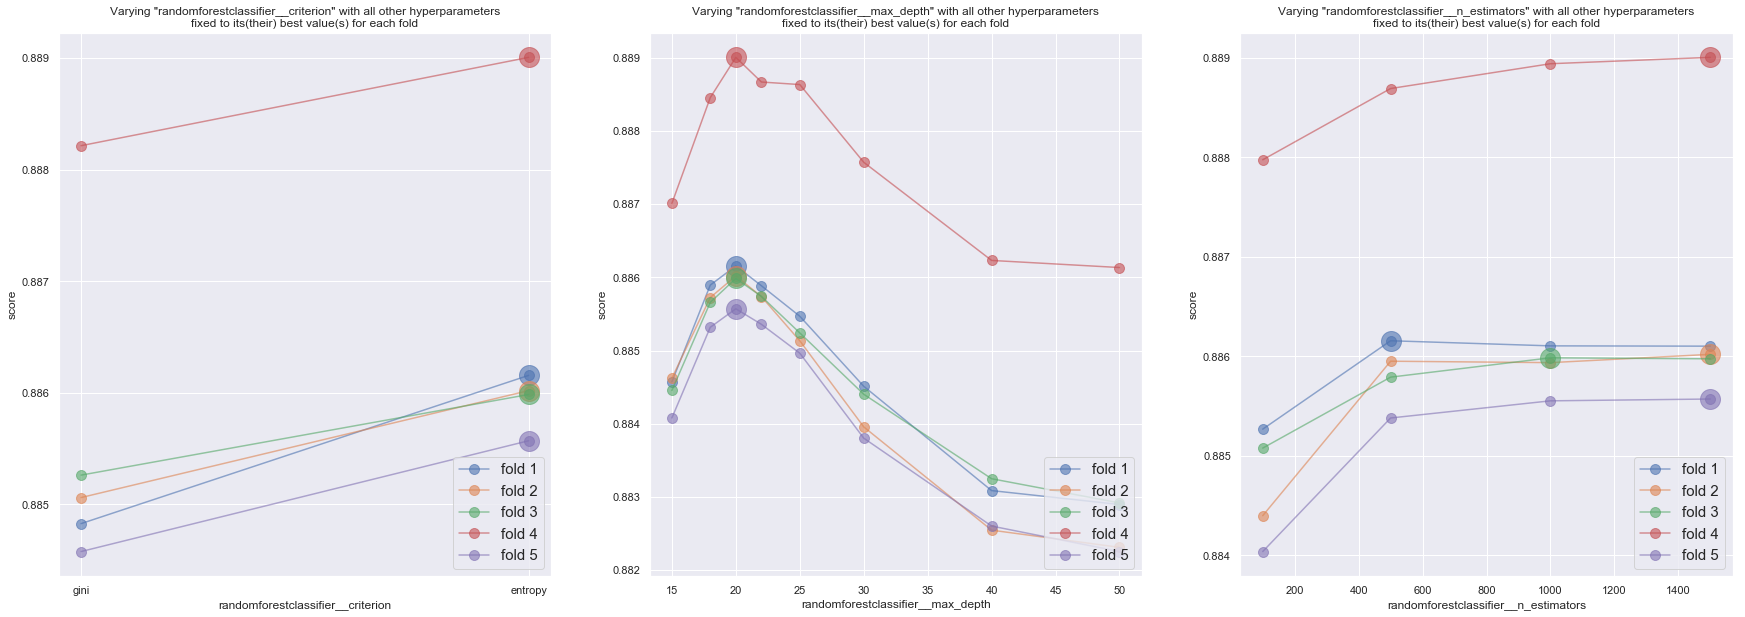

In [18]:
job.metrics.plot_grid_search_results(plot_error_bar=False)

In [49]:
summary.add(job.metrics, 'RandomForest', 'purple')

Fit model... done! (6.59s)


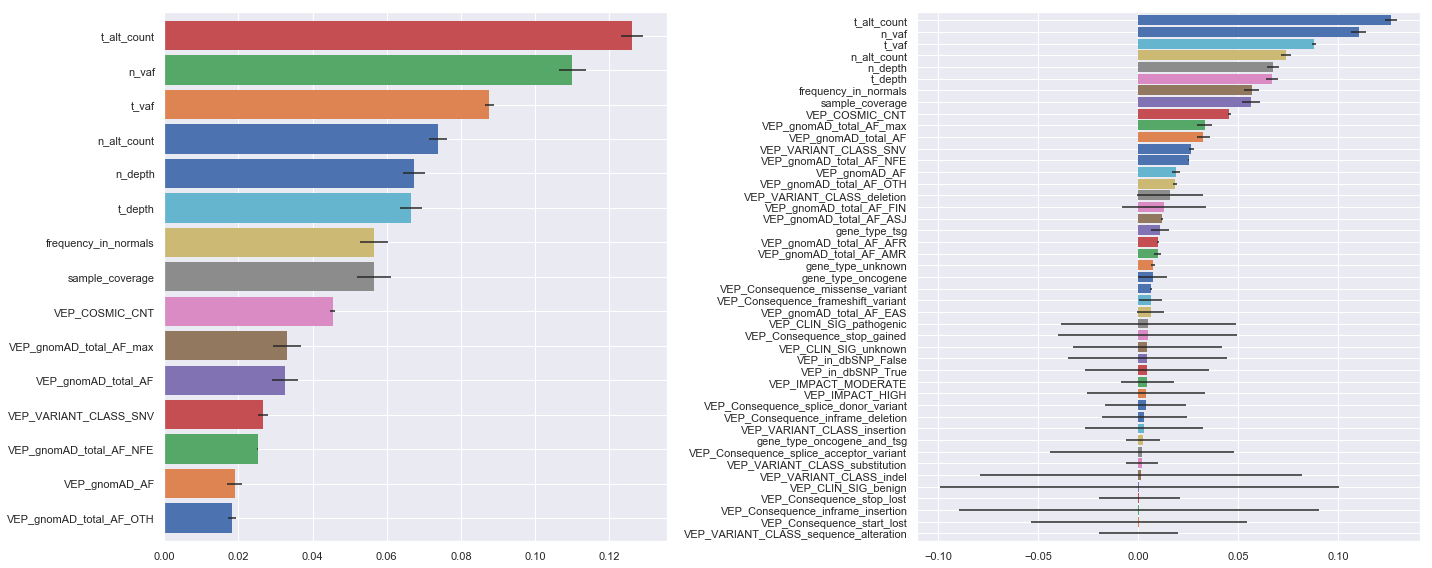

In [41]:
from sklearn.ensemble import RandomForestClassifier

model_bestRF = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                             RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=20, criterion='entropy', n_jobs=5))

metrics = Metrics(model_bestRF, X, y, cv_strategy, n_jobs=5, run_model=False)
metrics.plot_features_importance(random_forest=True, pipeline_step_index=1)

# Gradient Boosting

In [35]:
job = Selene_Job('GradientBoosting_181105', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs')

➞ mkdir on local computer ssh_remote_jobs/job_GradientBoosting_181105


<span style="color:green">Job < GradientBoosting_181105 >: </span>✅ created

In [53]:
job = Selene_Job('GradientBoosting_181105', 'guilminp', '/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < GradientBoosting_181105 >: </span>✅ job found and reloaded

In [37]:
job.load_data(X, y)

➞ save X.pkl & y.pkl in ssh_remote_jobs/job_GradientBoosting_181105


<span style="color:green">Job < GradientBoosting_181105 >: </span>✅ data loaded

In [38]:
%%writefile {job.script_path}

# load the ml_tools functions
%run ../../../../../utils/Python/metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# choose a model and run it
from sklearn.ensemble import GradientBoostingClassifier
parameters_grid = [
                    {'gradientboostingclassifier__loss': ['deviance', 'exponential'],
                     'gradientboostingclassifier__learning_rate': [0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.15, 0.2],
                     'gradientboostingclassifier__n_estimators': [20, 50, 100, 500, 800],
                     'gradientboostingclassifier__max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20]}
                  ]
pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                     GradientBoostingClassifier(random_state=42))
model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Writing ssh_remote_jobs/job_GradientBoosting_181105/script.ipy


In [39]:
job.run(n_jobs=5, short_job=False, memory=8)

➞ scp ssh_remote_jobs/job_GradientBoosting_181105 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_GradientBoosting_181105
script.ipy                                    100% 1505    80.4KB/s   00:00    
X.pkl                                         100%   50MB  12.5MB/s   00:04    
y.pkl                                         100% 3745KB  14.9MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/somatic_classification/ssh_remote_jobs/job_GradientBoosting_181105
Job <30403585> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J GradientBoosting_181105 -n 5 -R "span[ptile=5,mem=8]" "ipython script.ipy"


<span style="color:green">Job < GradientBoosting_181105 >: </span>✅ submitted<br>

In [54]:
job.get_results()

<span style="color:red">Job < GradientBoosting_181105 >: </span>⚠️ does not exist on the cluster, is not done yet or an error occured before the creation of `metrics.pkl`<br>

▴ Mean average_precision: 0.588 ± 0.016
▴ Mean roc_auc          : 0.897 ± 0.005
▴ Mean precision        : 0.209 ± 0.009
▴ Mean recall           : 0.763 ± 0.025
▴ Mean f1               : 0.328 ± 0.010
▴ Mean accuracy         : 0.884 ± 0.007


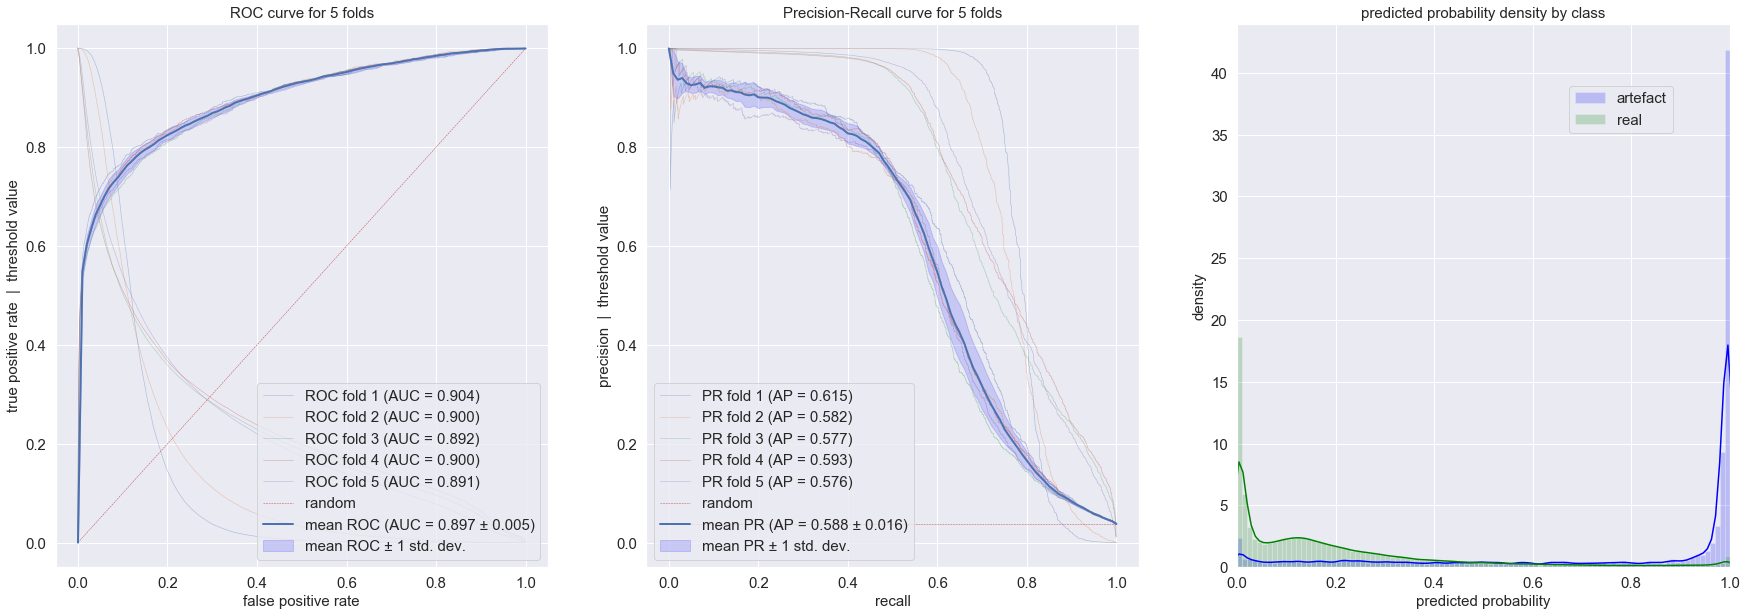

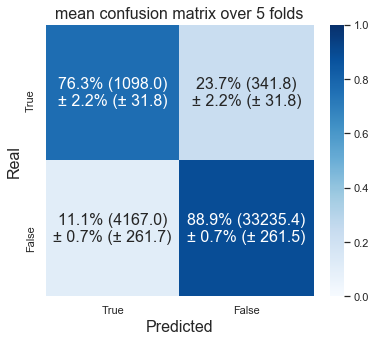

In [16]:
job.metrics.print_mean()
job.metrics.plot_threshold_decision_curves()
job.metrics.plot_mean_confusion_matrix()

4 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → gradientboostingclassifier__learning_rate: [0.05 0.08 0.09 0.1 0.11 0.12 0.2]
  → gradientboostingclassifier__loss         : ['deviance' 'exponential']
  → gradientboostingclassifier__max_depth    : [4 5 6 7 8 9 10 11 12 20]
  → gradientboostingclassifier__n_estimators : [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'gradientboostingclassifier__learning_rate': 0.12, 'gradientboostingclassifier__loss': 'deviance', 'gradientboostingclassifier__max_depth': 12, 'gradientboostingclassifier__n_estimators': 500}
fold 1: {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__loss': 'exponential', 'gradientboostingclassifier__max_depth': 9, 'gradientboostingclassifier__n_estimators': 500}
fold 2: {'gradientboostingclassifier__learning_rate': 0.12, 'gradientboostingclassifier__loss': 'deviance', 'gradientboostingclassifier__max_depth': 7, 'gradientboostingclassi

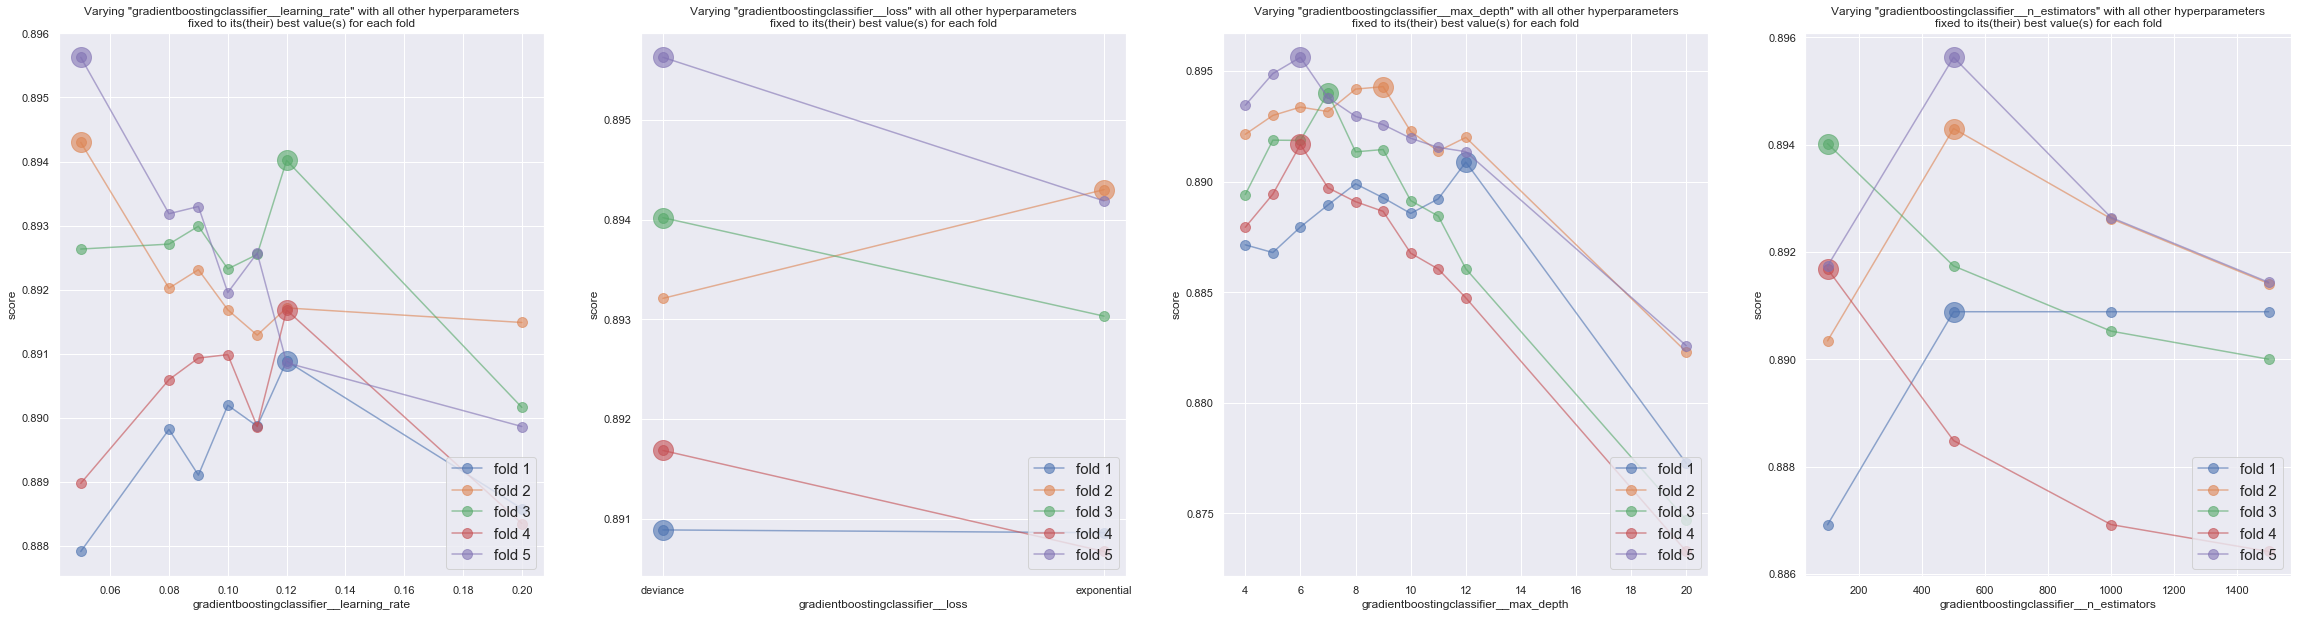

In [17]:
job.metrics.plot_grid_search_results(plot_error_bar = False)

In [52]:
summary.add(job.metrics, 'GradientBoosting', 'darkblue')

Fit model... done! (179.49s)


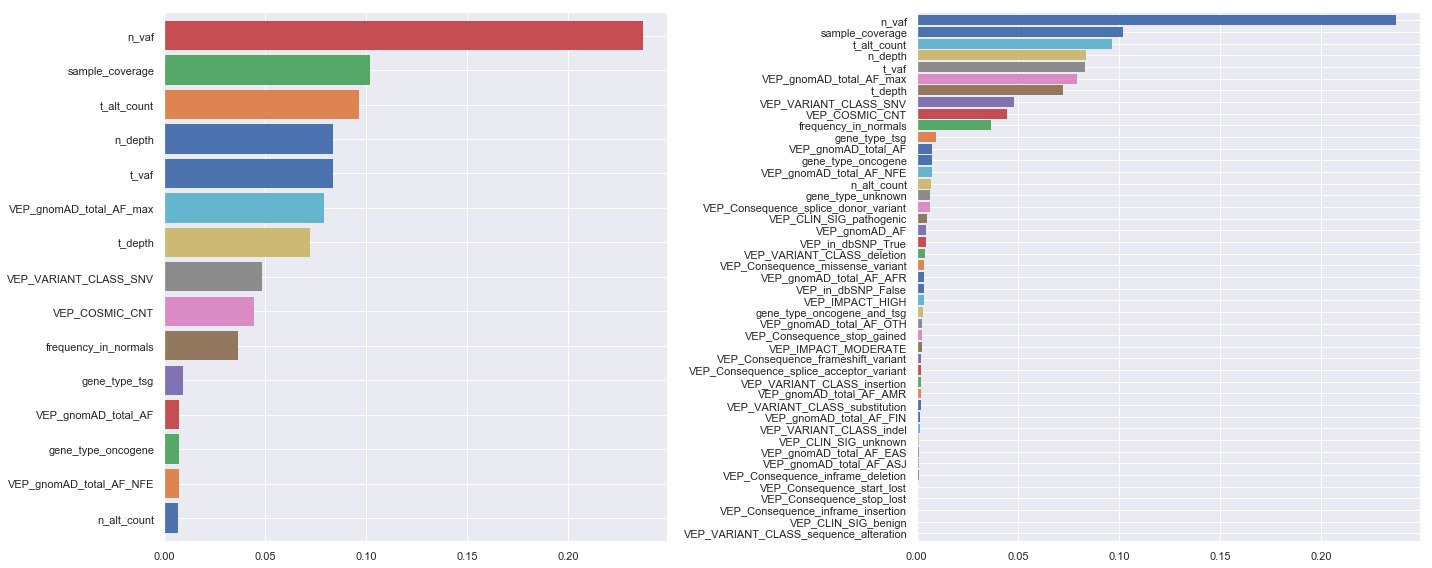

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

model_bestGB = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                             GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=1000, max_depth=10, loss='deviance'))

metrics = Metrics(model_bestGB, X, y, cv_strategy, n_jobs=5, run_model=False)
metrics.plot_features_importance(random_forest=False, pipeline_step_index=1)

Fit model... done! (185.60s)


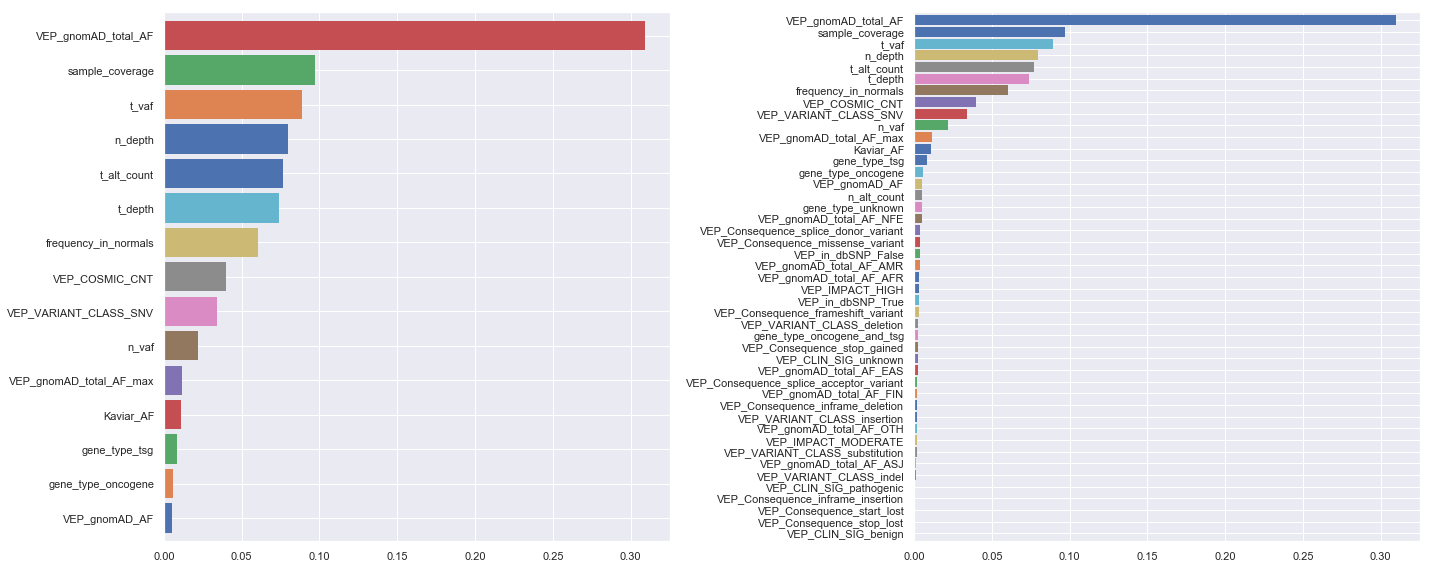

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

model_bestGB = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                             GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=1000, max_depth=10, loss='deviance'))

metrics = Metrics(model_bestGB, X, y, cv_strategy, n_jobs=5, run_model=False)
metrics.plot_features_importance(random_forest=False, pipeline_step_index=1)

# Summary

In [54]:
#summary.save('summaries/algorithm_comparison.pkl')

In [55]:
summary = Summary()
summary.load('summaries/algorithm_comparison.pkl')

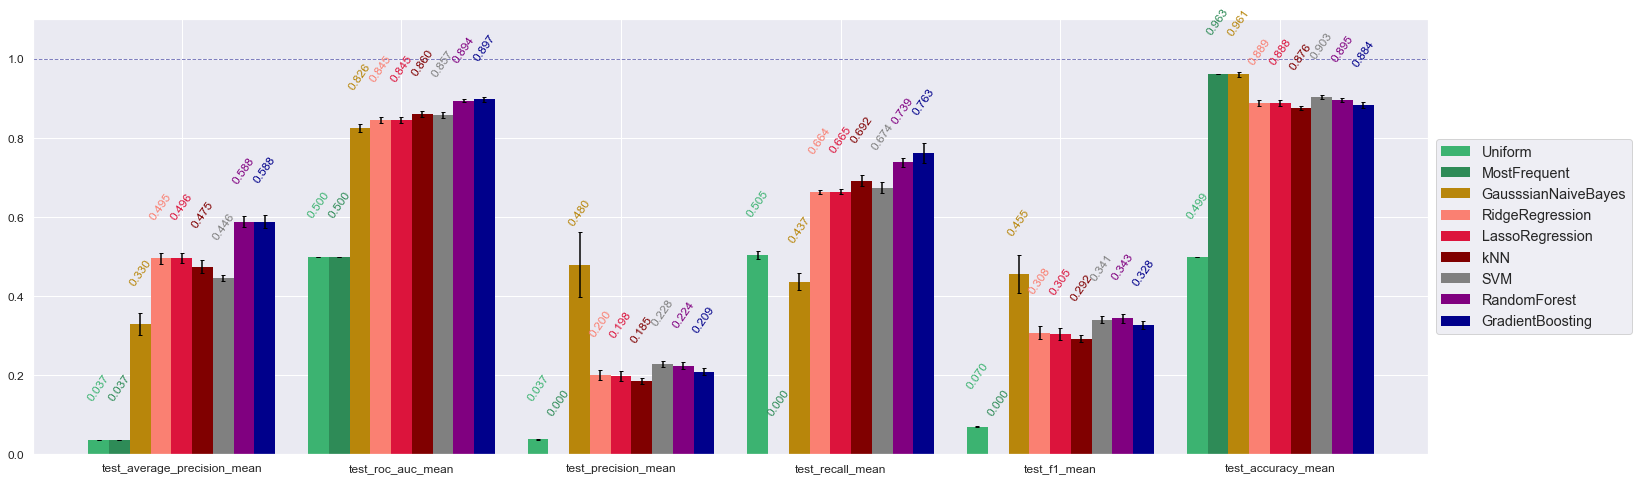

In [56]:
summary.display()
summary.plot()